In [1]:
%reload_ext autoreload

import numpy as np
import pickle as pk
import matplotlib.pyplot as pl
import matplotlib
from getdist import plots, MCSamples
import scipy.integrate as integrate

matplotlib.use('PS')

%matplotlib inline

In [2]:
param_names = ['PhiPP']
param_labels = ['\\Phi_{PP}']
param_min = np.array([.1])
param_max = np.array([1.9])
param_range = [param_min, param_max]
param_true = np.array([1.])

In [3]:
posterior_samples = pk.load(open("./data/ABC_posteriors/BinnedABCposterior_samples.pk", 'rb'))
posterior_samples_atsmc = pk.load(open("./data/ABC_posteriors/BinnedABCposterior_samples_atsmc.pk", 'rb'))
likelihood = pk.load(open("./data/exact_likelihoods/likelihood_skymap_for_exactlikelihood_v02.pk", 'rb'))
posterior_samples.shape
posterior_samples_atsmc.shape

(2665,)

Removed no burn in


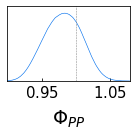

In [4]:
if (1):
    #Getdist requires specification of parameter ranges to get accurate contours
    ranges = {}
    markers={} #true parameter values
    for ii in range(0,len(param_min)):
        ranges[param_names[ii]] = [param_min[ii], param_max[ii]]
        markers[param_names[ii]] = param_true[ii]
        
    psamps = MCSamples(samples = posterior_samples, ranges = ranges, names = param_names, labels = param_labels)    


    g = plots.get_subplot_plotter()
    g.settings.title_limit_fontsize = 16 # reference size for 3.5 inch subplot
    g.settings.axes_fontsize=18
    g.settings.legend_fontsize = 26
    g.settings.axes_labelsize = 22
    g.triangle_plot(psamps, filled=True, markers=markers)

Removed no burn in


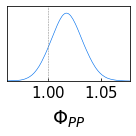

In [5]:
if (1):
    #Getdist requires specification of parameter ranges to get accurate contours
    ranges = {}
    markers={} #true parameter values
    for ii in range(0,len(param_min)):
        ranges[param_names[ii]] = [param_min[ii], param_max[ii]]
        markers[param_names[ii]] = param_true[ii]
        
    psamps_atsmc = MCSamples(samples = posterior_samples_atsmc, ranges = ranges, names = param_names, labels = param_labels)    


    g = plots.get_subplot_plotter()
    g.settings.title_limit_fontsize = 16 # reference size for 3.5 inch subplot
    g.settings.axes_fontsize=18
    g.settings.legend_fontsize = 26
    g.settings.axes_labelsize = 22
    g.triangle_plot(psamps_atsmc, filled=True, markers=markers)

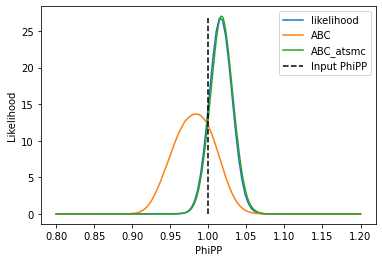

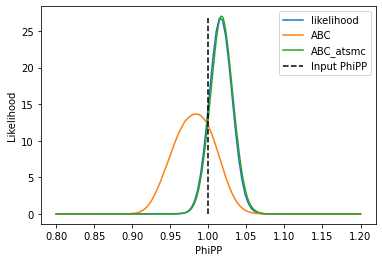

In [6]:
Lnorm = integrate.simps(np.exp(likelihood['lnlike_arr'] - np.max(likelihood['lnlike_arr'])), likelihood['phipp_arr'])
x = np.linspace(np.min(likelihood['phipp_arr']), np.max(likelihood['phipp_arr']), 1000)
ABC_norm = integrate.simps(psamps.get1DDensity('PhiPP')(x), x)
ABC_atsmc_norm = integrate.simps(psamps_atsmc.get1DDensity('PhiPP')(x), x)
fig, ax = pl.subplots(1,1)
ax.plot(likelihood['phipp_arr'], np.exp(likelihood['lnlike_arr'] - np.max(likelihood['lnlike_arr']))/Lnorm, label = 'likelihood')
#hist, bin_edges = np.histogram(posterior_samples[:,0], bins = 50, range = (np.min(likelihood['phipp_arr']), np.max(likelihood['phipp_arr'])))
#ax.plot(bin_edges[:-1], hist/np.max(hist), label = 'ABC')
ax.plot(x, psamps.get1DDensity('PhiPP')(x)/ABC_norm, label = 'ABC')
ax.plot(x, psamps_atsmc.get1DDensity('PhiPP')(x)/ABC_atsmc_norm , label = 'ABC_atsmc')
ax.plot([1.0, 1.0], [0., 1/Lnorm], ls = 'dashed', color = 'black', label = 'Input PhiPP')
#ax.set_xscale('log')
ax.set_xlabel('PhiPP')
ax.set_ylabel('Likelihood')
ax.legend()
fig

0.0 7.18186261046774e-05 [4.03748612e-06 7.18186261e-05]
0.0 0.0480815740135822 [0.00259554 0.04808157]
0.0 8.344824512481329e-05 [4.90320653e-06 8.34482451e-05]
0.0 0.0480815740135822 [0.00259554 0.04808157]
0.0 0.0001280518490364947 [9.53348889e-06 1.28051849e-04]
0.0 0.04877279783508845 [0.00227337 0.0487728 ]
0.0 6.117016137239824e-05 [4.79148198e-06 6.11701614e-05]
0.0 0.04877279783508845 [0.00227337 0.0487728 ]


Text(0.5, 1.0, 'ABC Energy Info')

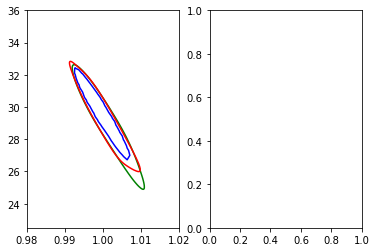

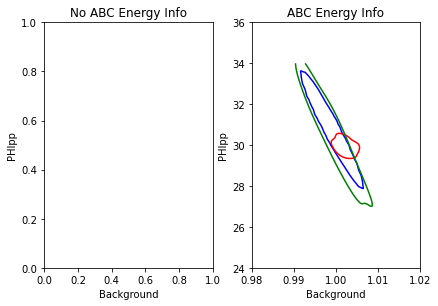

In [9]:
def get_contour_levels(prob_mat, desired_prob_levels = [0.68, 0.95]):
    #normalize the probability matrix
    prob_mat_normalized = prob_mat/np.sum(prob_mat)
    
    #sort highest to lowest probability
    prob_sort_indices = np.argsort(prob_mat_normalized.flatten())[::-1]
    prob_sorted = prob_mat_normalized.flatten()[prob_sort_indices]
    
    #take cumulative sum of this sorted array - whenever this crosses desired threshold,
    #that will be a contour level
    cumulative_prob = np.cumsum(prob_sorted)
    
    output_levels = np.zeros(len(desired_prob_levels))
    for ci in range(0,len(desired_prob_levels)):
        index = np.min(np.where(cumulative_prob > desired_prob_levels[ci])[0])
        output_levels[ci] = prob_sorted[index]
    return prob_mat_normalized, np.flip(output_levels)

post_load = pk.load(open('./data/exact_likelihoods/likelihood_skymap_for_exactlikelihood_withbgTrue_v01.pk','rb'))
lnposterior = post_load['lnlike_arr']
prob_mat = np.exp(lnposterior - np.max(lnposterior))
prob_mat_normalized, c_levels = get_contour_levels(prob_mat, desired_prob_levels = [0.0, 0.95])
fig,ax = pl.subplots(1,2)
ax[0].contour(post_load['background_norm_arr'], post_load['phipp_arr'], prob_mat_normalized, \
            levels = c_levels, colors= ['blue'])

ABC_post_load = pk.load(open('./data/ABC_posteriors/densityDict_2param_08.pk','rb'))
D = ABC_post_load['density']
ABC_prob_mat = (D.P.T-np.min(D.P.T))/np.max(D.P.T)
ABC_prob_mat_normalized, ABC_c_levels = get_contour_levels(ABC_prob_mat, desired_prob_levels = [0.0, 0.95])
print(np.min(ABC_prob_mat_normalized), np.max(ABC_prob_mat_normalized), ABC_c_levels)
print(np.min(prob_mat_normalized), np.max(prob_mat_normalized), c_levels)
ax[0].contour(D.y, D.x, ABC_prob_mat_normalized, \
            levels = ABC_c_levels, colors= ['green'])

ABC_post_load = pk.load(open('./data/ABC_posteriors/densityDict_2param_11.pk','rb'))
D = ABC_post_load['density']
ABC_prob_mat = (D.P.T-np.min(D.P.T))/np.max(D.P.T)
ABC_prob_mat_normalized, ABC_c_levels = get_contour_levels(ABC_prob_mat, desired_prob_levels = [0.0, 0.95])
print(np.min(ABC_prob_mat_normalized), np.max(ABC_prob_mat_normalized), ABC_c_levels)
print(np.min(prob_mat_normalized), np.max(prob_mat_normalized), c_levels)
ax[0].contour(D.y, D.x, ABC_prob_mat_normalized, \
            levels = ABC_c_levels, colors= ['red'])

post_load = pk.load(open('./data/exact_likelihoods/likelihood_skymap_for_exactlikelihood_withbgTrue_v02.pk','rb'))
lnposterior = post_load['lnlike_arr']
prob_mat = np.exp(lnposterior - np.max(lnposterior))
prob_mat_normalized, c_levels = get_contour_levels(prob_mat, desired_prob_levels = [0.0, 0.95])
fig,ax = pl.subplots(1,2)
ax[1].contour(post_load['background_norm_arr'], post_load['phipp_arr'], prob_mat_normalized, \
            levels = c_levels, colors= ['blue'])

ABC_post_load = pk.load(open('./data/ABC_posteriors/densityDict_2param_withenergy_01.pk','rb'))
D = ABC_post_load['density']
ABC_prob_mat = (D.P.T-np.min(D.P.T))/np.max(D.P.T)
ABC_prob_mat_normalized, ABC_c_levels = get_contour_levels(ABC_prob_mat, desired_prob_levels = [0.0, 0.95])
print(np.min(ABC_prob_mat_normalized), np.max(ABC_prob_mat_normalized), ABC_c_levels)
print(np.min(prob_mat_normalized), np.max(prob_mat_normalized), c_levels)
ax[1].contour(D.y, D.x, ABC_prob_mat_normalized, \
            levels = ABC_c_levels, colors= ['red'])

ABC_post_load = pk.load(open('./data/ABC_posteriors/densityDict_2param_withenergy_02.pk','rb'))
D = ABC_post_load['density']
ABC_prob_mat = (D.P.T-np.min(D.P.T))/np.max(D.P.T)
ABC_prob_mat_normalized, ABC_c_levels = get_contour_levels(ABC_prob_mat, desired_prob_levels = [0.0, 0.95])
print(np.min(ABC_prob_mat_normalized), np.max(ABC_prob_mat_normalized), ABC_c_levels)
print(np.min(prob_mat_normalized), np.max(prob_mat_normalized), c_levels)
ax[1].contour(D.y, D.x, ABC_prob_mat_normalized, \
            levels = ABC_c_levels, colors= ['green'])

fig.tight_layout()
ax[0].set_ylabel('PHIpp')
ax[0].set_xlabel('Background')
ax[0].set_title('No ABC Energy Info')
ax[1].set_ylabel('PHIpp')
ax[1].set_xlabel('Background')
ax[1].set_title('ABC Energy Info')